In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread

#categories görüntülerin olduğu klasör isimleri ile aynı olmalı
categories = ['cars','ice_cream_cone','cricket_ball'] #0,1,2

if not os.path.isfile('knn_model.p'):
    flat_data_arr = []
    target_arr = []
    datadir = 'dataset' #görüntülerin bulunduğu dizinin adı ve yolu

    #tüm görüntüleri kategori, isim ve yollarını da içerecek şekilde flat_data_arr ve target_arr değişkenlerine aktarılıyor
    print('Kategoriler içindeki resimler yükleniyor...')
    for category in categories:
        path = os.path.join(datadir,category)
        #ilgili kategori altındaki resimler yükleniyor
        for img in os.listdir(path):
            img_array = imread(os.path.join(path,img))
            img_resized = resize(img_array,(150,150,3))
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(categories.index(category))
        print(f'... {category} kategorisi içindeki resimler başarıyla yüklendi.')
    flat_data = np.array(flat_data_arr)
    target = np.array(target_arr)
    df = pd.DataFrame(flat_data)
    df['target']=target
    inp = df.iloc[:,:-1] #girdi verisi
    out = df.iloc[:,-1] #çıktı verisi
    
    from sklearn.naive_bayes import GaussianNB
    from sklearn.model_selection import GridSearchCV
    par = {'var_smoothing': np.logspace(0,-9, num=100)}
    
    nb = GaussianNB()
    model = GridSearchCV(nb, par, verbose=1, cv=10, n_jobs=-1)
    
    #model eğitiliyor ve en iyi parametrelerin ne olduğu belirleniyor.
    print('\nModel eğitiliyor...')
    from sklearn.model_selection import train_test_split
    #veriler test ve eğitim verisi olarak ayrılıyor. test_size ile test verisinin toplam verinin % kaçı olacağı belirleniyor.
    x_train,x_test,y_train,y_test = train_test_split(inp,out,test_size=0.20,random_state=77,stratify=out)
    model.fit(x_train,y_train)
    print('... Model, eğitim görüntüleri ile eğitilmiştir.')
    print(f'... GridSearchCV belirlediği en iyi model parametreleri: {model.best_params_}') #GridSearchCV'den en iyi parametrelerin ne olduğu yazdırılıyor.

    #model test ediliyor.
    print('\nModel test ediliyor...')
    from sklearn.metrics import accuracy_score
    y_pred = model.predict(x_test)
    print(f"... {y_pred} -> Tahmin sonuçları")
    print(f"... {np.array(y_test)} -> Gerçek değerler")
    print(f"... Model doğruluk oranı: %{accuracy_score(y_pred,y_test)*100} dir.")

    #model diske kayıt ediliyor...
    p = open('nb_model.p','wb')
    pickle.dump(model,p)
    p.close()
    print("\nModel diske kayıt edilmiştir.")
else:
    #diskten model yükleniyor.
    model = pickle.load(open('nb_model.p','rb'))
    print("\nModel diskten yüklenmiştir.")


Kategoriler içindeki resimler yükleniyor...
... cars kategorisi içindeki resimler başarıyla yüklendi.
... ice_cream_cone kategorisi içindeki resimler başarıyla yüklendi.
... cricket_ball kategorisi içindeki resimler başarıyla yüklendi.

Model eğitiliyor...
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
... Model, eğitim görüntüleri ile eğitilmiştir.
... GridSearchCV belirlediği en iyi model parametreleri: {'var_smoothing': 0.0023101297000831605}

Model test ediliyor...
... [0 0 2 2 0 0 1 2 0 1 2 2 0 2 2 0 0 0 2 0] -> Tahmin sonuçları
... [0 0 2 2 0 1 1 2 0 1 2 2 0 1 2 0 0 0 1 1] -> Gerçek değerler
... Model doğruluk oranı: %80.0 dir.

Model diske kayıt edilmiştir.



Resmin URL adresini giriniz:https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTrMoKpm6_Hv3QuKJdvZuk5FjY1txmADOk3IQ&usqp=CAU


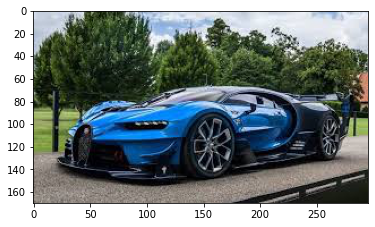

cars = 100.0%
ice_cream_cone = 0.0%
cricket_ball = 0.0%
Görüntünün sınıfı (tahmin) : cars


In [2]:
#model değerlendirmesi yapılıyor.
#örnek url: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTrMoKpm6_Hv3QuKJdvZuk5FjY1txmADOk3IQ&usqp=CAU
url = input('\nResmin URL adresini giriniz:')
img = imread(url)
plt.imshow(img)
plt.show()
img_resize = resize(img,(150,150,3))
flat_img = [img_resize.flatten()]
tahmin = model.predict_proba(flat_img)
for i,category in enumerate(categories):
    print(f'{category} = {round(tahmin[0][i]*100,2)}%')
print("Görüntünün sınıfı (tahmin) : " + categories[model.predict(flat_img)[0]])